IMPORTING NECESSARY LIBRARIES

In [9]:
import pandas as pd #for DataFrame operations
import camelot as cml #To extract tabular data from PDFs
import PyPDF2 #To Read the text from the PDF

USING PyPDF2 TO KNOW THE NO. OF PAGES IN THE STATEMENT

In [10]:
pdfObj=open('pdfDecrypted.pdf','rb')
pdfReader=PyPDF2.PdfFileReader(pdfObj)
pdfReader.numPages

2

MAKING A COMMA SEPARATED STRING OF PAGE NUMBERS FOR USE IN CAMELOT FUNCTION

In [11]:
pagesStr=','.join(str(x) for x in range(1,pdfReader.numPages+1))
pagesStr

'1,2'

USING CAMELOT'S READ_PDF METHOD FOR ALL THE PAGES IN THE PDF TO EXTRACT THE TABLE IN EACH PAGE.

In [13]:
tables=cml.read_pdf('pdfDecrypted.pdf',flavor='stream',pages=pagesStr)

THE METHOD RETURNS A TABLELIST OF THE TABLES FOUND IN ALL THE PAGES.

In [14]:
tables

<TableList n=2>

WE DISPLAY ALL THE TABLES FOUND BY CAMELOT

In [41]:
tables[0].df #BELOW IS THE MAIN TRANSACTIONS TABLE

,0,1,2,3,4,5
0,,Statement of Transactions in Savings Account X...,,,,
1,DATE,MODE,PARTICULARS,DEPOSITS,WITHDRAWALS,BALANCE
2,01-06-2020,,B/F,,,23.13
3,19-06-2020,,UPI/017122030174/UPI/soniajain168@ok/Axis Bank...,"1,000.00",,"1,023.13"
4,,,UPI/017223057154/JIO20BR0004TLLU/jio@yesbank/Y...,,,
5,20-06-2020,,,,199.00,824.13
6,,,Ltd/,,,
7,22-06-2020,,UPI/017300130046/UPI/paytm-52031033@/Paytm Pay...,,120.00,704.13
8,22-06-2020,,UPI/017417267350/UPI/payzomato@hdfcb/HDFC BANK...,,326.24,377.89
9,29-06-2020,,UPI/017917810088/UPI/soniajain168@ok/Axis Bank...,500.00,,877.89


In [42]:
tables[1].df #THIS IS THE TABLE WE FOUND ON THE NEXT PAGE (THE PAGE ONLY HAS TEXT)

,0
0,Thank you for evaluating Wondershare PDF Passw...
1,You can only convert 5 pages with the trial ve...
2,"To get all the pages converted, you need to pu..."
3,http://cbs.wondershare.com/go.php?pid=526&m=db


WE SHOW A CONTOUR PLOT WITH TABLE AREA WHICH WAS DETECTED,OUTLINED.

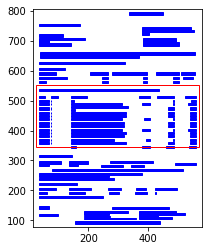

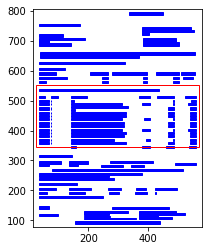

In [27]:
cml.plot(tables[0], kind='contour')

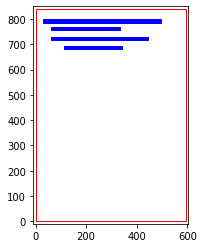

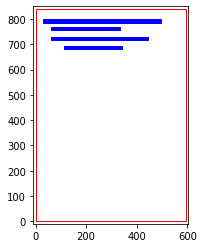

In [28]:
cml.plot(tables[1], kind='contour')

NOW,WE USE ANOTHER WAY TO EXTRACT TABULAR DATA FROM THE PDF USING THE SAME METHOD-'READ_PDF'

HERE,WE EXTRACT DATA FROM THE FIRST PAGE,USING THE TABLE AREAS PARAMETER ,WHICH TAKES ARGUMENTS X1,Y1,X2,Y2-WHICH ARE THE TOP-LEFT AND BOTTOM RIGHT COORDINATES OF THE TABLE.WE GOT THE COORDINATES FROM THE CONTOUR PLOT ABOVE.

In [44]:
tables_second_method=cml.read_pdf('pdfDecrypted.pdf',flavor='stream',table_areas=['0,520,600,320'])
tables_second_method

<TableList n=1>

In [30]:
tables_second_method[0].df 

,0,1,2,3,4,5
0,DATE,MODE,PARTICULARS,DEPOSITS,WITHDRAWALS,BALANCE
1,01-06-2020,,B/F,,,23.13
2,19-06-2020,,UPI/017122030174/UPI/soniajain168@ok/Axis Bank...,"1,000.00",,"1,023.13"
3,,,UPI/017223057154/JIO20BR0004TLLU/jio@yesbank/Y...,,,
4,20-06-2020,,,,199.00,824.13
5,,,Ltd/,,,
6,22-06-2020,,UPI/017300130046/UPI/paytm-52031033@/Paytm Pay...,,120.00,704.13
7,22-06-2020,,UPI/017417267350/UPI/payzomato@hdfcb/HDFC BANK...,,326.24,377.89
8,29-06-2020,,UPI/017917810088/UPI/soniajain168@ok/Axis Bank...,500.00,,877.89
9,29-06-2020,,UPI/017977507301/NA/7701835137@payt/Kotak Mahi...,,550.00,327.89


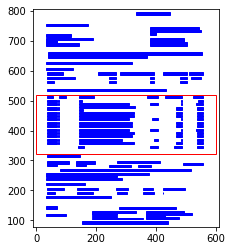

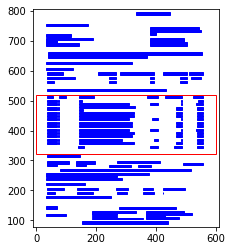

In [32]:
cml.plot(tables_second_method[0], kind='contour')

THROUGH THE SAME PARAMETER WE FIND OTHER TABLES IN THE PDF 

In [34]:
tables_second_method2=cml.read_pdf('pdfDecrypted.pdf',flavor='stream',table_areas=['0,600,600,550'])
tables_second_method2

<TableList n=1>

In [35]:
tables_second_method2[0].df

,0,1,2,3,4
0,ACCOUNT TYPE,A/C. BALANCE (I),FIXED DEPOSITS (LINKED) BAL. (II),TOTAL BALANCE (I+II),NOMINATION
1,Savings A/c XXXXXXXX6159,133.47,0.00,133.47,Registered
2,TOTAL,133.47,0.00,133.47,


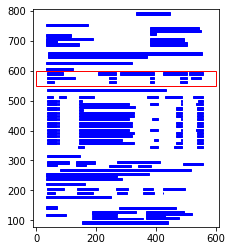

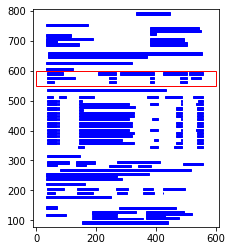

In [36]:
cml.plot(tables_second_method2[0], kind='contour')

In [37]:
tables_second_method3=cml.read_pdf('pdfDecrypted.pdf',flavor='stream',table_areas=['0,210,600,180'])
tables_second_method3

<TableList n=1>

In [38]:
tables_second_method3[0].df

,0,1,2,3,4
0,ACCOUNT TYPE,ACCOUNT NUMBER,MICR CODE,IFS CODE,NAME OF NOMINEE*
1,Savings,XXXXXXXX6159,576229002,ICIC0000072,-


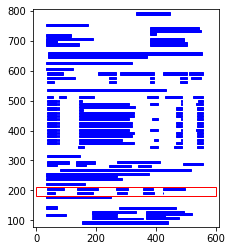

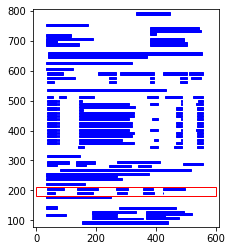

In [39]:
cml.plot(tables_second_method3[0], kind='contour')

MAKING PROPER DATAFRAMES FROM THE TABLES WE PROCURED

In [45]:
table_1=tables_second_method[0].df

In [54]:
table_1.columns=table_1.iloc[0].values.tolist()

In [60]:
table_1.drop(0,axis=0,inplace=True)

In [61]:
table_2=tables_second_method2[0].df
table_2.columns=table_2.iloc[0].values.tolist()
table_2.drop(0,axis=0,inplace=True)

In [62]:
table_3=tables_second_method3[0].df
table_3.columns=table_3.iloc[0].values.tolist()
table_3.drop(0,axis=0,inplace=True)

In [63]:
table_1

,DATE,MODE,PARTICULARS,DEPOSITS,WITHDRAWALS,BALANCE
1,01-06-2020,,B/F,,,23.13
2,19-06-2020,,UPI/017122030174/UPI/soniajain168@ok/Axis Bank...,"1,000.00",,"1,023.13"
3,,,UPI/017223057154/JIO20BR0004TLLU/jio@yesbank/Y...,,,
4,20-06-2020,,,,199.00,824.13
5,,,Ltd/,,,
6,22-06-2020,,UPI/017300130046/UPI/paytm-52031033@/Paytm Pay...,,120.00,704.13
7,22-06-2020,,UPI/017417267350/UPI/payzomato@hdfcb/HDFC BANK...,,326.24,377.89
8,29-06-2020,,UPI/017917810088/UPI/soniajain168@ok/Axis Bank...,500.00,,877.89
9,29-06-2020,,UPI/017977507301/NA/7701835137@payt/Kotak Mahi...,,550.00,327.89
10,29-06-2020,,UPI/017977812234/NA/7701835137@payt/Kotak Mahi...,,100.00,227.89


In [64]:
table_2

,ACCOUNT TYPE,A/C. BALANCE (I),FIXED DEPOSITS (LINKED) BAL. (II),TOTAL BALANCE (I+II),NOMINATION
1,Savings A/c XXXXXXXX6159,133.47,0.00,133.47,Registered
2,TOTAL,133.47,0.00,133.47,


In [65]:
table_3

,ACCOUNT TYPE,ACCOUNT NUMBER,MICR CODE,IFS CODE,NAME OF NOMINEE*
1,Savings,XXXXXXXX6159,576229002,ICIC0000072,-
